In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import random

In [3]:
df = pd.read_csv('Customer Classification dataset/Train.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


# delete outliers

In [4]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

numeric_cols.remove('ID')

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


# separate X, y

In [5]:
features = df.drop(['ID', 'Segmentation'], axis=1)
target = df['Segmentation']

In [6]:
features

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


# encoding

In [7]:
columns_to_encode = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1']

features = pd.get_dummies(
    features,
    columns=columns_to_encode,
    prefix=columns_to_encode,
    drop_first=True 
)
features.head()

,Age,Work_Experience,Spending_Score,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,Low,4.0,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
2,67,1.0,Low,1.0,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,67,0.0,High,2.0,True,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
5,56,0.0,Average,2.0,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,32,1.0,Low,3.0,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [8]:
print(features['Spending_Score'].unique())
score_mapping = {
    'Low': 0,
    'Average': 1,
    'High': 2
}
features['Spending_Score'] = features['Spending_Score'].map(score_mapping)
features.head()

['Low' 'High' 'Average']


,Age,Work_Experience,Spending_Score,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,0,4.0,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
2,67,1.0,0,1.0,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,67,0.0,2,2.0,True,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
5,56,0.0,1,2.0,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,32,1.0,0,3.0,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False


# Filling Nan's

In [9]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=8)
imputed_X = imputer.fit_transform(features)
features = pd.DataFrame(imputed_X, columns=features.columns)

# an Example

Accuracy: 0.4883546205860255

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.65      0.49       330
           1       0.38      0.13      0.20       320
           2       0.55      0.56      0.55       333
           3       0.61      0.60      0.61       348

    accuracy                           0.49      1331
   macro avg       0.48      0.48      0.46      1331
weighted avg       0.49      0.49      0.47      1331


Confusion Matrix:
 [[213  24  42  51]
 [135  42 106  37]
 [ 68  36 185  44]
 [125   8   5 210]]


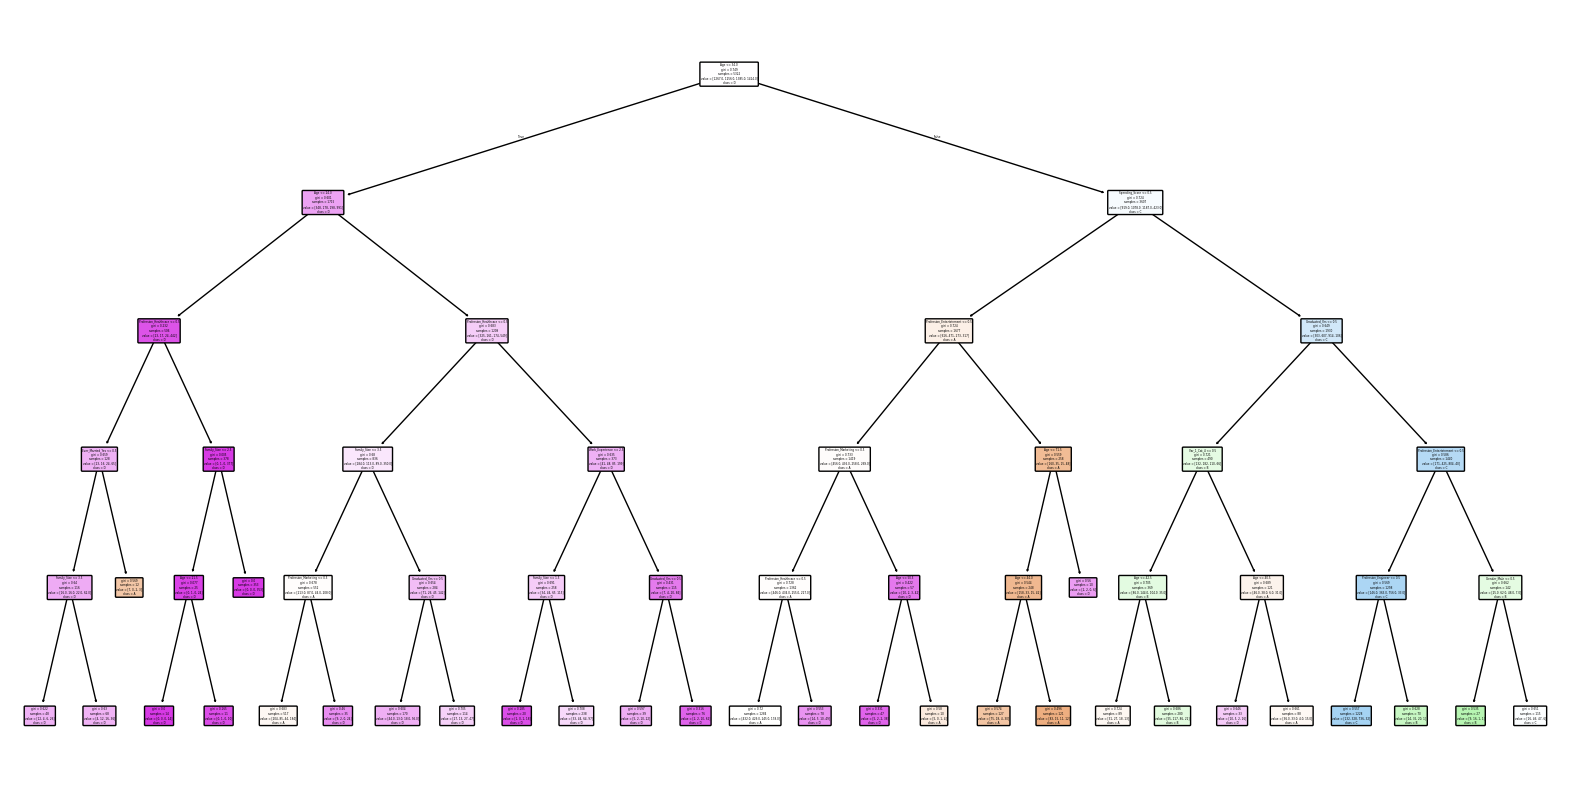


Feature Importance:
                      Feature  Importance
0                        Age    0.527119
2             Spending_Score    0.168048
11     Profession_Healthcare    0.089830
6              Graduated_Yes    0.070761
9   Profession_Entertainment    0.047599
14      Profession_Marketing    0.034238
3                Family_Size    0.018870
8        Profession_Engineer    0.012508
17               Var_1_Cat_4    0.011461
1            Work_Experience    0.010301
4                Gender_Male    0.005458
5           Ever_Married_Yes    0.003806
7          Profession_Doctor    0.000000
12      Profession_Homemaker    0.000000
10      Profession_Executive    0.000000
15               Var_1_Cat_2    0.000000
13         Profession_Lawyer    0.000000
16               Var_1_Cat_3    0.000000
18               Var_1_Cat_5    0.000000
19               Var_1_Cat_6    0.000000
20               Var_1_Cat_7    0.000000


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(
    features, y_encoded, test_size=0.2, random_state=42
)

dt_model = DecisionTreeClassifier(
    max_depth=5, 
    min_samples_leaf= 10,
    min_samples_split = 20,
    random_state=42
)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    filled=True,
    feature_names=list(features.columns),
    class_names=list(le.classes_), 
    rounded=True
)
plt.show()

feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)

In [11]:
def initialize(count, column_count):
    zero_array = np.zeros((1, column_count), dtype=int)
    my_set = set()

    while len(my_set) != count:
        random_numbers = random.sample(range(0, 21), column_count)
        copied_zero_array = zero_array.copy()
        for i in range(column_count):
            copied_zero_array[0][i] = random_numbers[i]
        my_set.add(tuple(copied_zero_array[0]))
    my_list = list(my_set)
    return my_set
        
def get_fitness(gen_set, X, count, y):
    gen_list = list(gen_set)[count]
    columns = X.columns
#     for i in range(len(gen_list)):
#         X = X.drop(columns[gen_list[i]], axis=1)
    cols_to_drop = [X.columns[i] for i in gen_list if i < len(X.columns)]
    X_new = X.drop(cols_to_drop, axis=1)
    return calculate_accuracy(X_new, y)
        
def calculate_accuracy(X, y):
    le = preprocessing.LabelEncoder()
    y_encoded = le.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    dt_model = DecisionTreeClassifier(
    max_depth=5, 
    min_samples_leaf= 10,
    min_samples_split = 20,
    random_state=42
    )
    
    dt_model.fit(X_train, y_train)

    y_pred = dt_model.predict(X_test)

    return accuracy_score(y_test, y_pred)

def roulette_wheel_selection(initial_gen, fitness_list, repeatable, count):
    indices = list(range(len(fitness_list)))
    if repeatable:
        #repeatable
        selected_index = random.choices(indices, weights=fitness_list, k=count)
    else:
        #non-repeatable
        selected_index = np.random.choice(indices, size=count, replace=False, p=fitness_list/sum(fitness_list))
    selected_ones = list()
    initial_gen = list(initial_gen)
    for i in selected_index:
        selected_ones.append(initial_gen[i])
    return selected_ones

def get_rank_array(my_list):
    sorted_with_indices = sorted([(value, idx) for idx, value in enumerate(my_list)])

    rank_dict = {}
    for rank, (value, idx) in enumerate(sorted_with_indices):
        if value not in rank_dict:  
            rank_dict[value] = rank + 1  

    ranked_list = [rank_dict[value] for value in my_list]
#     print(ranked_list)
    return np.array(ranked_list)



def rank_based_selection(initial_gen, fitness_list, repeatable, count):
    fitness_list = get_rank_array(list(fitness_list))
        
    indices = list(range(len(fitness_list)))
    if repeatable:
        #repeatable
        selected_index = random.choices(indices, weights=fitness_list, k=count)
    else:
        #non-repeatable
        selected_index = np.random.choice(indices, size=count, replace=False, p=fitness_list/sum(fitness_list))
    selected_ones = list()
    initial_gen = list(initial_gen)
    for i in selected_index:
        selected_ones.append(initial_gen[i])
    return selected_ones
    


def tournament_selection(initial_gen, gen_fitnesss, replacement, count, sample=2):
    selected_population = []

    if replacement:
        for _ in range(count):
            tournament_indices = random.choices(range(len(initial_gen)), k=sample)
            winner_index = max(tournament_indices, key=lambda i: gen_fitnesss[i])
            selected_population.append(initial_gen[winner_index])
    else:
        not_used = list(range(len(initial_gen)))
        thrown = []

        while len(not_used) >= sample and len(selected_population) < count:
            tournament_indices = random.sample(not_used, sample)
            winner_index = max(tournament_indices, key=lambda i: gen_fitnesss[i])
            selected_population.append(initial_gen[winner_index])
            for idx in tournament_indices:
                not_used.remove(idx)
                if idx != winner_index:
                    thrown.append(idx)

        pool = thrown + not_used
        while len(selected_population) < count and pool:
            if len(pool) >= sample:
                tournament_indices = random.sample(pool, sample)
            else:
                tournament_indices = random.choices(pool, k=sample)
            winner_index = max(tournament_indices, key=lambda i: gen_fitnesss[i])
            selected_population.append(initial_gen[winner_index])

    return selected_population


def single_point_crossover(parents):
    offspring = []
    for i in range(0, len(parents), 2):
        if i + 1 < len(parents):
            p1, p2 = parents[i], parents[i + 1]
            cross_point = random.randint(1, len(p1) - 1)
            child1 = p1[:cross_point] + p2[cross_point:]
            child2 = p2[:cross_point] + p1[cross_point:]
            offspring.extend([child1, child2])
    return offspring

def two_point_crossover(parents):
    offspring = []
    for i in range(0, len(parents), 2):
        if i + 1 < len(parents):
            p1, p2 = parents[i], parents[i + 1]
            point1 = random.randint(1, len(p1) - 2)
            point2 = random.randint(point1 + 1, len(p1) - 1)
            child1 = p1[:point1] + p2[point1:point2] + p1[point2:]
            child2 = p2[:point1] + p1[point1:point2] + p2[point2:]
            offspring.extend([child1, child2])
    return offspring

def uniform_crossover(parents, swap_prob=0.5):
    offspring = []
    for i in range(0, len(parents), 2):
        if i + 1 < len(parents):
            p1, p2 = parents[i], parents[i + 1]
            child1, child2 = [], []
            for gene1, gene2 in zip(p1, p2):
                if random.random() < swap_prob:
                    child1.append(gene2)
                    child2.append(gene1)
                else:
                    child1.append(gene1)
                    child2.append(gene2)
            offspring.extend([''.join(child1), ''.join(child2)])
    return offspring



def mutate(individual, max_value):
    index = random.randint(0, len(individual) - 1)
    new_value = random.randint(1, max_value)
    while new_value in individual:
        new_value = random.randint(1, max_value)
    individual[index] = new_value
    return individual
    

In [18]:
def GA(X, y, count, column_count, repeatable, select_count, selection_type='roulette_wheel_selection', max_generations = 100, target_accuracy = 0.95, crossover='single_point', max_stagnation=20):
    initial_gen = initialize(count, column_count)
    generation = 0
    best_fitness = 0
    stagnation_counter = 0  # Track generations without improvement
    max_fitness_list = list()
    while generation < max_generations and best_fitness < target_accuracy:
        fitness_list = list()
        
        for i in range(len(initial_gen)):
            fitness_list.append(get_fitness(initial_gen, X, i, y))
        
        current_max = max(fitness_list)
        previous_best = best_fitness
        best_fitness = max(best_fitness, current_max)

        # Checking improvement happened
        if best_fitness == previous_best:
            stagnation_counter += 1
        else:
            stagnation_counter = 0
            
        if best_fitness not in max_fitness_list:
            max_fitness_list.append(max(fitness_list))
        
        # Early stopping if no improvement for 'max_stagnation' generations
        if stagnation_counter >= max_stagnation:
            break
        
        #selection's algorithms
#         print(fitness_list)
        if selection_type == 'roulette_wheel_selection':
            selected_ones = roulette_wheel_selection(initial_gen, fitness_list, repeatable, select_count)
        elif selection_type == 'rank_based_selection':
            selected_ones = rank_based_selection(initial_gen, fitness_list, repeatable, select_count)
        else:
            selected_ones = tournament_selection(initial_gen, fitness_list, repeatable, select_count)

#         print(f'selected_ones : {selected_ones}')
        if crossover == 'single_point':
            offspring = single_point_crossover(selected_ones)
        elif crossover == 'two_point':
            offspring = two_point_crossover(selected_ones)
        elif crossover == 'uniform':
            offspring = uniform_crossover(selected_ones)
        else:
            raise ValueError('Invalid crossover')

#         print(f'offspring : {offspring}')
        mutated_offspring = [mutate(list(child), column_count * 2) for child in offspring]
        initial_gen = mutated_offspring
        generation += 1
    print('why?')
    print(max_fitness_list)
    return mutated_offspring

In [19]:
GA(features, target, 8, 3, False, 8, 'rank_based_selection')

why?
[0.49211119459053343, 0.49436513899323814]


[[4, 5, 6],
 [4, 1, 6],
 [1, 5, 3],
 [4, 2, 3],
 [1, 5, 2],
 [1, 6, 2],
 [4, 3, 5],
 [2, 1, 3]]